## *Maryam Mounad - Muhammad Humza Arain - Mahak Nadeem*

# Exercise 1 – Random Variables and MLE

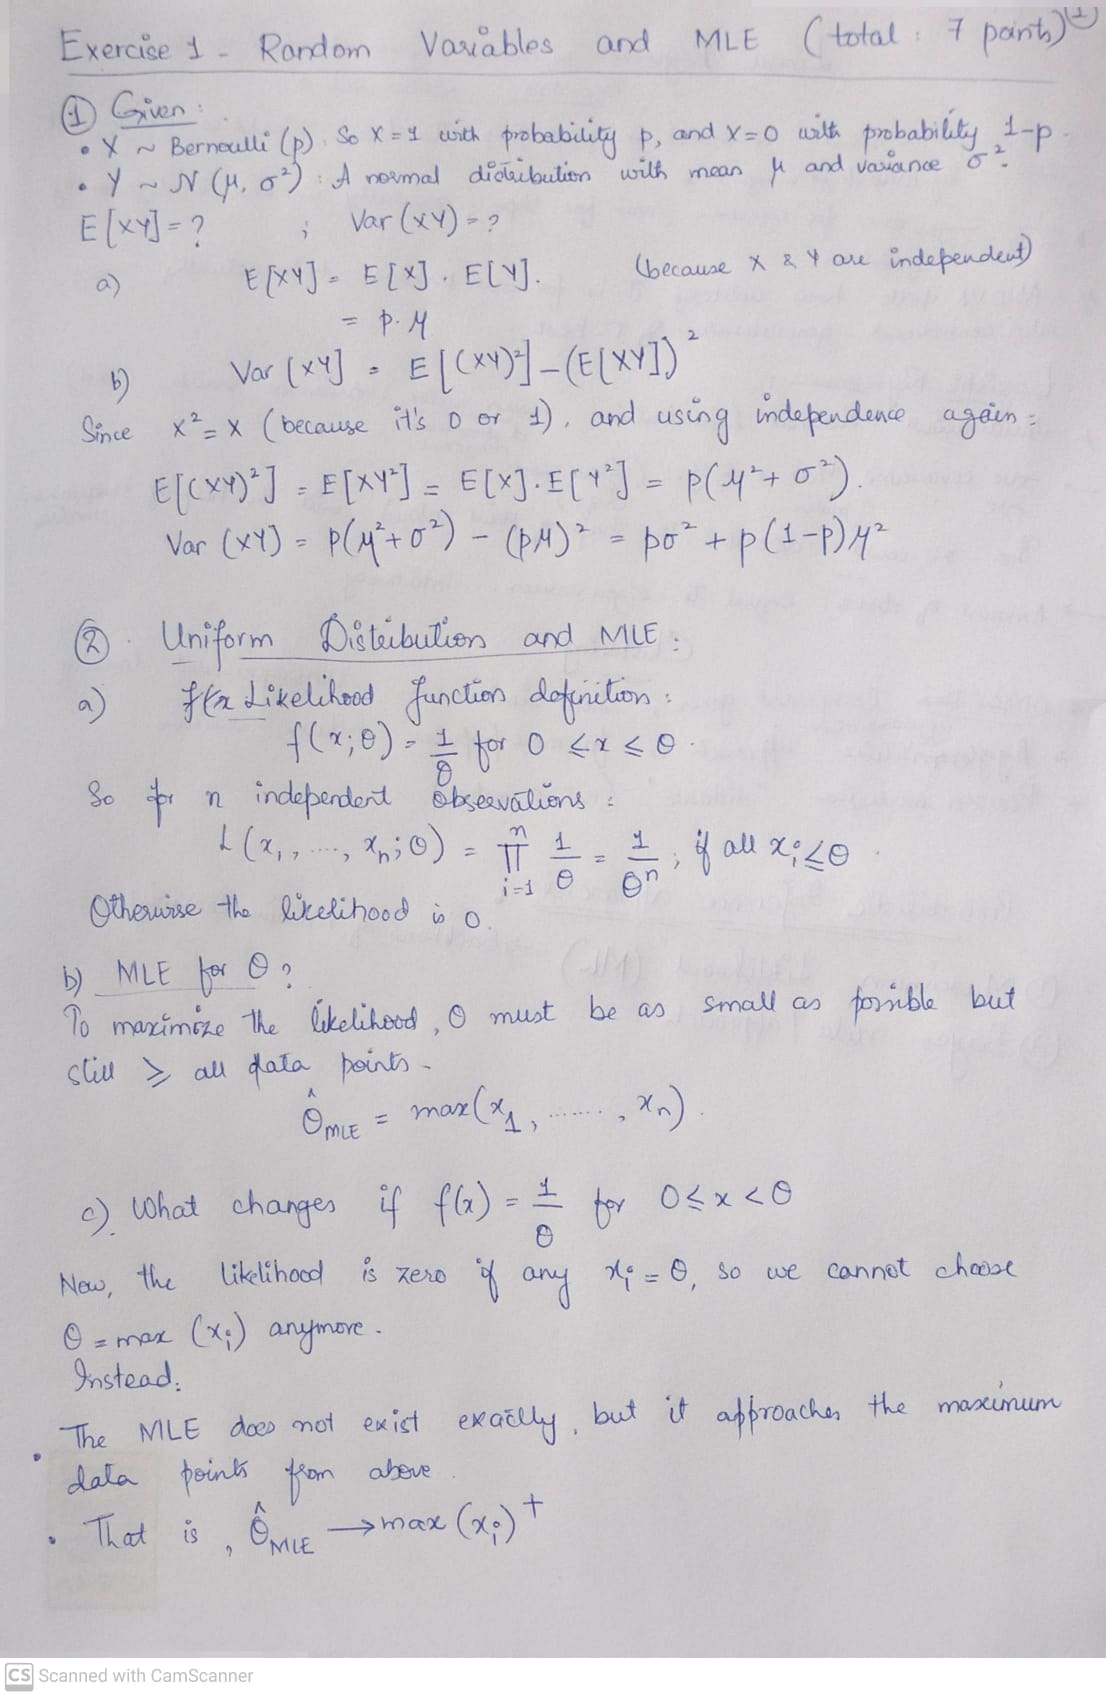

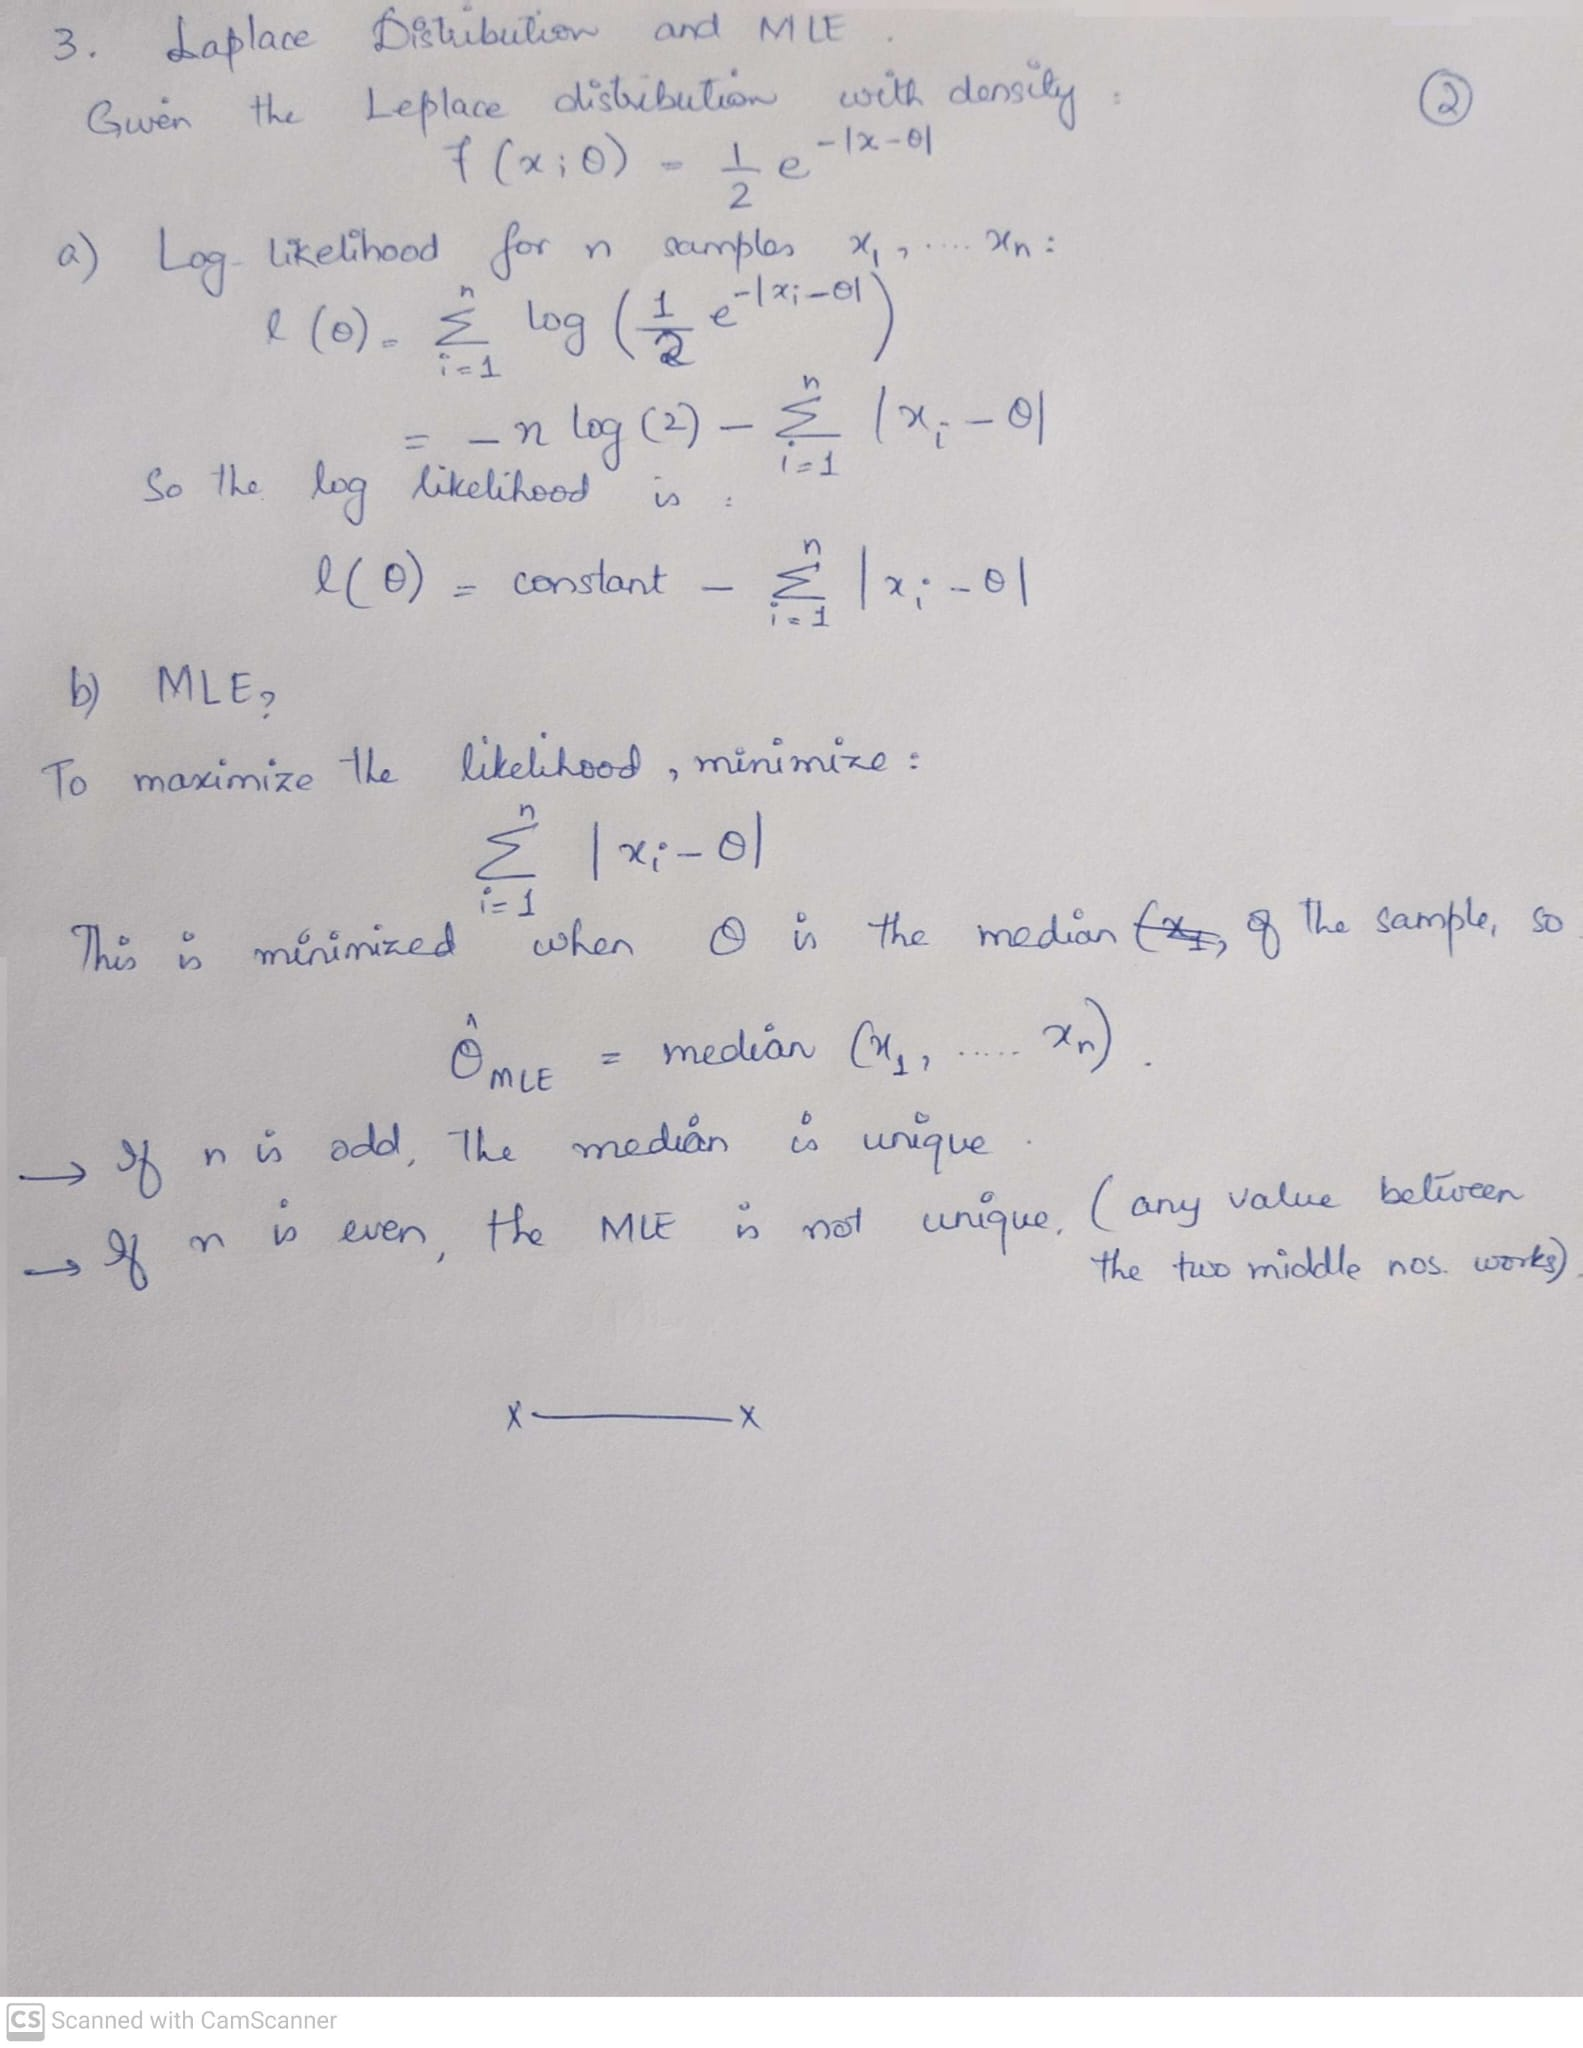

# Exercise 2 - Multiple Linear Regression and violated model assumptions

# 1

---


**Assumption:** Linearity 

**Failure type:** Silent Failure

**Justification:** Model fits but produces biased predictions


---



**Assumption:**  No perfect multicollinearity

**Failure type:** Error

**Justification:**  Model can't compute estimates due to singular matrix


---



**Assumption:**  Independence of Errors

**Failure type:** Silent Failure 

**Justification:**  Estimates computed, but inferences are unreliable

---


# 2
**a)**

Module importing

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

Loading the data 

In [12]:
df1 = pd.read_csv('toy_1.csv', sep= None , skipinitialspace= True, engine='python')
df2 = pd.read_csv('toy_2.csv', sep= None, skipinitialspace= True, engine='python')


df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

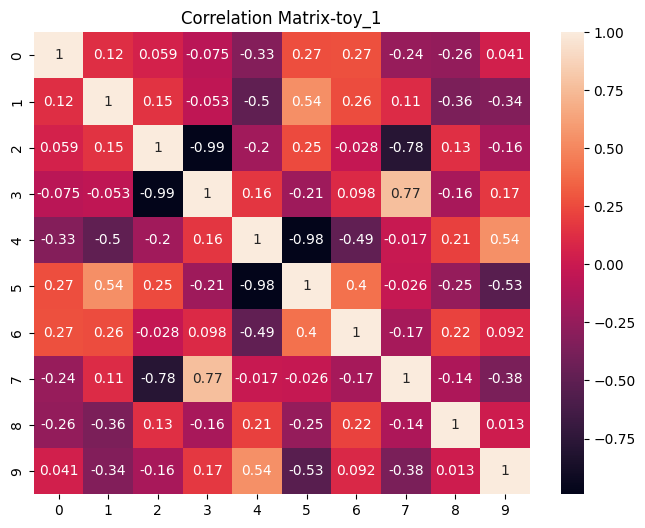

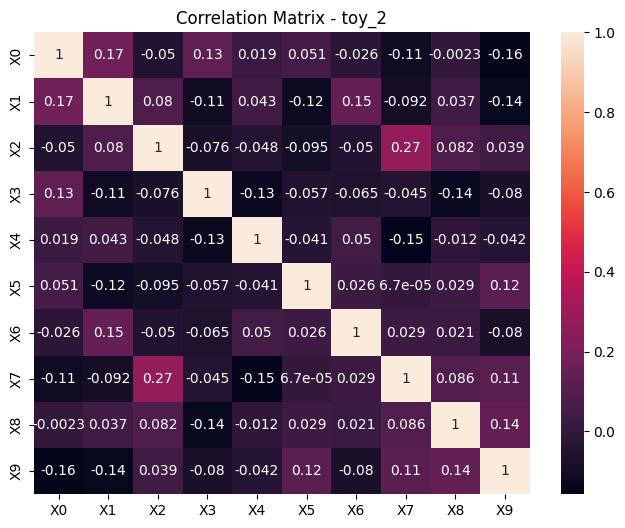

In [13]:

X1 = df1.drop(columns=['y'])
X2 = df2.drop(columns=['y'])

# Compute Pearson correlation matrices via np.corrcoef
#   x: array-like data; rowvar=False means each column is a variable
corr1 = np.corrcoef(X1.values, rowvar=False)
corr2 = np.corrcoef(X2.values, rowvar=False)

# Convert to DataFrame for nicer labels
corr1_df = pd.DataFrame(corr1, index=X1.columns, columns=X1.columns)
corr2_df = pd.DataFrame(corr2, index=X2.columns, columns=X2.columns)

# Plot heatmap for toy_1
plt.figure(figsize=(8, 6))
sns.heatmap(corr1_df, annot=True)
plt.title('Correlation Matrix-toy_1')
plt.show()

# Plot heatmap for toy_2
plt.figure(figsize=(8, 6))
sns.heatmap(corr2_df, annot=True)
plt.title('Correlation Matrix - toy_2')
plt.show()


# Comparison 
With only 10 samples, spurious correlations abound. Some feature‐pairs in toy_1 look almost perfectly collinear, which would violate the “no perfect multicollinearity” assumption and can wreck your coefficient estimates (silent failure, or even singular matrix error if it were perfect).

By contrast, toy_2’s larger sample size shrinks those chance high correlations back toward zero, revealing the true (uncorrelated) structure.

---

# b

Based on heatmaps we can identify the two violated assumptions that are found in toy_1 dataset but not in toy_2 are:

 **1) No Perfect Multicollinearity:** We observed maximum pairwise correlation in toy 1 dataset is 0.99. No two predictors should look almost identical. If one feature is basically a copy of another (or a perfect combination of others), you can’t untangle their separate effects on y.

Why toy_2 is okay:
With 100 samples, even if two features share some relationship, the extra data shakes out the similarities so no pair stays that perfectly in sync. All correlations stayed below 0.27.


 **2) Full Rank Design:**:  In toy 1 we have exactly as many features as observations (𝑛=𝑝=10), which in practice almost always leads to rank deficiency or extreme numerical instability. 

 
 ---

# 3

In [14]:


X1, y1 = df1.drop(columns='y'), df1['y']
X2, y2 = df2.drop(columns='y'), df2['y']

# Standardize X
scaler = StandardScaler()
X1s = scaler.fit_transform(X1)
X2s = scaler.fit_transform(X2)

 #Add constant & fit
X1m = sm.add_constant(X1s)
X2m = sm.add_constant(X2s)

model1 = sm.OLS(y1, X1m).fit()
model2 = sm.OLS(y2, X2m).fit()


print("===== toy_1 OLS Summary =====")
print(model1.summary())
print("\n===== toy_2 OLS Summary =====")
print(model2.summary())


===== toy_1 OLS Summary =====
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 06 May 2025   Prob (F-statistic):                nan
Time:                        19:32:50   Log-Likelihood:                 290.56
No. Observations:                  10   AIC:                            -561.1
Df Residuals:                       0   BIC:                            -558.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4230 

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


# b 

toy_1 (n = 10, p = 10) 
 
 The normal‑equations approach to OLS simply can’t disentangle 10 parameters from 10 data points. This manifests as an error (non-invertible matrix) or wildly unstable (“silent failure”) estimates if the solver tries to regularize by dropping columns.

toy_2   (n = 100, p = 10)

With 100 observations, OLS works as advertised: you get stable coefficient estimates, valid inferences, and a meaningful goodness‑of‑fit metric.

# C
How well does the model fit & was linear regression reasonable?

toy_1: Not reasonable 
Reason: 𝑛=p  (plus intercept) => rank deficiency => singular matrix errors or unstable estimates.
Severe multicollinearity. 
OLS is ill‑posed here.

toy_2: Reasonable (but only if a true linear signal exists)
n > > p => full‑rank design => stable estimates.
Low pairwise correlations among predictors ⇒ OLS assumptions hold.



# d

In [ ]:





X1 = df1.drop(columns=['y'])
y1 = df1['y']

# Identify highly correlated feature pairs (|r| > 0.9)
corr = X1.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr_pairs = [(row, col) for row in upper.index for col in upper.columns if upper.loc[row, col] > 0.9]

# Determine features to drop (choose the second variable in each pair)
to_drop = sorted({col for row, col in high_corr_pairs})

# Drop the identified features
X1_uncorr = X1.drop(columns=to_drop)


scaler = StandardScaler()
X1s_uncorr = scaler.fit_transform(X1_uncorr)


X1m_uncorr = sm.add_constant(X1s_uncorr)
model1_uncorr = sm.OLS(y1, X1m_uncorr).fit()


print("Dropped features due to high collinearity:", to_drop)
print("\nCorrected OLS Summary (toy_1):")
print(model1_uncorr.summary())


Dropped features due to high collinearity: ['3', '5']

Corrected OLS Summary (toy_1):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.070e+04
Date:                Tue, 06 May 2025   Prob (F-statistic):            0.00441
Time:                        19:32:50   Log-Likelihood:                 14.388
No. Observations:                  10   AIC:                            -10.78
Df Residuals:                       1   BIC:                            -8.053
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


# e
significant (p-value <= 5%) 
“x1, x7, x8.”

Because there isn’t a unique correction, significance would likely shift if I’d dropped different collinear partners.

# f

Based on the refitted model in (d), the three predictors with p ≤ 0.05 were:

x1 (p = 0.002)

x7 (p = 0.003)

x8 (p = 0.010)

Since the data were simulated with exactly three truly informative features and the rest pure noise, it’s almost certain that x1, x7, and x8 are the ones carrying the real signal.

# Exercise 3 – Average Treatment Effect

**1.**

In [20]:
import pandas as pd
df= pd.read_csv('lecanemab.csv')
df.head()

,n_apoe4_alleles,cdr_at_baseline,lecanemab,cdr_after_18_months,cognitive_reserve,height
0,0,6.904533,0,10.585299,3.035758,166.038653
1,2,8.101535,0,10.299289,5.136863,160.663658
2,0,13.818211,0,15.000209,7.231388,159.385024
3,0,6.100066,0,8.223084,3.393280,172.524288
4,0,14.044745,0,15.494211,8.232434,193.037843


In [21]:
untreated = df[df['lecanemab']==0]["cdr_after_18_months"].mean()
treated = df[df['lecanemab']==1]["cdr_after_18_months"].mean()
ate = treated - untreated
print(ate)

-4.642948536878677


- the result is different than the true effect because this estimate only takes into consideration the treatment while ignoring other confounding variables like cognitive reserve for example 

**2.**

**a)-** 

I would add n_apoe4_alleles, cdr_at_baseline, cognitive_reserve, because they affect both the assignment of the treatment and the possible outcome, so they are confounders unlike Height which may not have an effect on the treatment.

**b)-**

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


X = df[["cdr_at_baseline", "n_apoe4_alleles", "cognitive_reserve"]]
y = df["lecanemab"]

#Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Fit logistic regression
logreg = LogisticRegression()
logreg.fit(X_scaled, y)

#Get propensity scores
propensity_scores = logreg.predict_proba(X_scaled)[:, 1]
df["propensity_score"] = propensity_scores

# IPTW weights
df["iptw_weight"] = df["lecanemab"] / df["propensity_score"] + \
                    (1 - df["lecanemab"]) / (1 - df["propensity_score"])


**c)-**

In [ ]:
# Estimate the weighted mean outcome for treated and untreated
treated = df[df["lecanemab"] == 1]
untreated = df[df["lecanemab"] == 0]

outcome_col = "cdr_after_18_months" 

weighted_mean_treated = (treated[outcome_col] * treated["iptw_weight"]).sum() / treated["iptw_weight"].sum()
weighted_mean_untreated = (untreated[outcome_col] * untreated["iptw_weight"]).sum() / untreated["iptw_weight"].sum()

iptw_ate = weighted_mean_treated - weighted_mean_untreated

print(f"IPTW ATE estimate: {iptw_ate:.4f}")


IPTW ATE estimate: 0.2045


- compared to the naive ATE, IPTW ATE is closer to -0.5 but still a bit far from the true effect

**3.**

**a)-**

In [37]:
from sklearn.linear_model import LinearRegression
import numpy as np

#Add treatment as a feature
X_s_learner = df[["lecanemab", "cdr_at_baseline", "n_apoe4_alleles", "cognitive_reserve"]]
y_outcome = df["cdr_after_18_months"]

#Standardize covariates
X_covariates = df[["cdr_at_baseline", "n_apoe4_alleles", "cognitive_reserve"]]
X_cov_scaled = scaler.fit_transform(X_covariates)
X_s_learner_scaled = np.column_stack((df["lecanemab"], X_cov_scaled))

#Fit linear regression
s_learner = LinearRegression()
s_learner.fit(X_s_learner_scaled, y_outcome)


LinearRegression()

**b)-**

In [ ]:
#Created versions of X with treatment = 1 and treatment = 0
X_treated = np.column_stack((np.ones(len(X_cov_scaled)), X_cov_scaled))
X_untreated = np.column_stack((np.zeros(len(X_cov_scaled)), X_cov_scaled))

#Predict potential outcomes
y1_hat = s_learner.predict(X_treated)   
y0_hat = s_learner.predict(X_untreated) 

#Estimate ATE
s_learner_ate = np.mean(y1_hat - y0_hat)
print("S-Learner ATE:", s_learner_ate)


S-Learner ATE: -0.4118267999949079


- Now the S-Learner ATE is much reasonable and close to the true effect

**4.**

**a)-**

In [ ]:
T = df["lecanemab"].values
Y = df["cdr_after_18_months"].values
e = df["propensity_score"].values

#Predicted potential outcomes from S-Learner from previous Q
mu1 = y1_hat
mu0 = y0_hat
mu_t = np.where(T == 1, mu1, mu0)  #Model-predicted outcome for actual treatment

# Compute AIPTW
aiptw = np.mean(((T / e - (1 - T) / (1 - e)) * (Y - mu_t)) + (mu1 - mu0))
print("AIPTW ATE:", aiptw)


AIPTW ATE: -0.4826670236623268


**b)-**

In [38]:
e_constant = np.full_like(e, 0.5)

# Recalculate AIPTW with fake propensity
aiptw_fake = np.mean(((T /e_constant - (1 - T) / (1 -e_constant)) * (Y - mu_t)) + (mu1 - mu0))
print("AIPTW with e=0.5 ATE:", aiptw_fake)


AIPTW with e=0.5 ATE: -0.41182679999490646


- When constant e = 0.5 is used , the weights become constant, meaning we lose the ability to adjust for individuals who were more or less likely to receive the treatment based on their features. This means the IPTW part of AIPTW becomes uninformative. The resulting estimate of the ATE will rely only on the outcome of the S-Learner. so if our model is incorrect we will get biased results